# Setup

## Library import
Import all the required Python libraries.

In [3]:
# For data manipulation
import numpy as np
import xarray as xr
import pandas as pd
import glidertools as gt
import os
from scipy.interpolate import griddata
# For Visualization
import panel as pn
import holoviews as hv
from holoviews import opts
import geoviews as gv
import param
import matplotlib.pyplot as plt
import palettable
from palettable.cmocean.sequential import Thermal_20
from palettable.cmocean.sequential import Haline_20
## Import hvplot apis for xarray and pandas
import hvplot.xarray
import hvplot.pandas 
## Use gliderpy to get data and to plot track and a data section
from gliderpy.fetchers import DatasetList
from gliderpy.fetchers import GliderDataFetcher
from gliderpy.plotters import plot_track, plot_transect

## Get Data

Search for gliders with the keywords UW and Scripps to get a collection of deployments in the USA west coast.

In [5]:
datasets = DatasetList()
search_terms = ["UW", "Scripps"]
ids = datasets.get_ids(search_terms=search_terms)

print(
    f"found {len(ids)} datasets matching the search terms {search_terms} on the server {datasets.e.server}"
)

ids

found 241 datasets matching the search terms ['UW', 'Scripps'] on the server https://gliders.ioos.us/erddap


array(['UW130-20150309T2005', 'UW130-20160523T1828',
       'UW130-20170605T1834', 'UW130-20181107T0000',
       'UW130-20200615T0000', 'UW157-20141116T2118',
       'UW157-20150917T1833', 'UW157-20161021T1807',
       'UW157-20180417T1832', 'UW157-20190916T0000',
       'UW157-20200917T0000', 'UW646-20190409T0000',
       'unit_595-20170713T1730-delayed', 'unit_191-20160710T2018',
       'sp039-20210225T2035', 'sp048-20210505T2044',
       'sp054-20210406T1719', 'Cormorant-20200909T1218-delayed',
       'nokomis-20180727T1911-delayed', 'ng261-20180801T0000',
       'SG187-20110430T1450', 'SG108-20130923T1728',
       'SG187-20100716T1208', 'SG187-20140625T1330',
       'SG187-20120912T1125', 'sp011-20210608T1944',
       'sp013-20210419T1718', 'sp025-20210505T2104',
       'sp028-20210218T2317', 'sp030-20201215T1823',
       'sp040-20210218T2325', 'sp041-20210419T1721',
       'sp055-20201209T1724', 'sp055-20210715T1611',
       'sp058-20201215T1831', 'sp064-20210324T1637',
       'sp

In [6]:
uw_grab = GliderDataFetcher()
uw_grab.fetcher.dataset_id = ids[40]

df = uw_grab.to_pandas()
df.head()

,pressure,latitude,longitude,salinity,temperature,dataset_url
time,,,,,,
2015-12-14 01:49:15+00:00,0.00,-8.1784,156.75805,NaN,NaN,https://gliders.ioos.us/erddap/tabledap/sp006-...
2015-12-14 01:49:15+00:00,113.04,-8.1784,156.75805,35.390,25.923,https://gliders.ioos.us/erddap/tabledap/sp006-...
2015-12-14 01:49:15+00:00,113.52,-8.1784,156.75805,35.323,25.935,https://gliders.ioos.us/erddap/tabledap/sp006-...
2015-12-14 01:49:15+00:00,113.88,-8.1784,156.75805,35.358,25.815,https://gliders.ioos.us/erddap/tabledap/sp006-...
2015-12-14 01:49:15+00:00,114.00,-8.1784,156.75805,35.396,26.079,https://gliders.ioos.us/erddap/tabledap/sp006-...


In [24]:
df = df.rename(columns={'pressure':'depth (m)',
                        'longitude':'longitude (degrees_east)',
                        'latitude':'latitude (degrees_north)',
                        'temperature':'temperature (Celsius)',
                        'salinity':'salinity (1)'}
              )
df['time'] = df.index.values.astype('datetime64[s]')
df.head()

,depth (m),latitude (degrees_north),longitude (degrees_east),salinity (1),temperature (Celsius),dataset_url,time
time,,,,,,,
2015-12-14 01:49:15+00:00,0.00,-8.1784,156.75805,NaN,NaN,https://gliders.ioos.us/erddap/tabledap/sp006-...,2015-12-14 01:49:15
2015-12-14 01:49:15+00:00,113.04,-8.1784,156.75805,35.390,25.923,https://gliders.ioos.us/erddap/tabledap/sp006-...,2015-12-14 01:49:15
2015-12-14 01:49:15+00:00,113.52,-8.1784,156.75805,35.323,25.935,https://gliders.ioos.us/erddap/tabledap/sp006-...,2015-12-14 01:49:15
2015-12-14 01:49:15+00:00,113.88,-8.1784,156.75805,35.358,25.815,https://gliders.ioos.us/erddap/tabledap/sp006-...,2015-12-14 01:49:15
2015-12-14 01:49:15+00:00,114.00,-8.1784,156.75805,35.396,26.079,https://gliders.ioos.us/erddap/tabledap/sp006-...,2015-12-14 01:49:15


### plotting track.

Text(0.5, 1.0, 'glider sp006-20151214T0021')

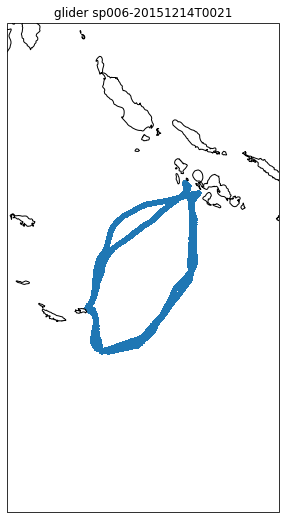

In [8]:
fig, ax = plot_track(df)
ax.set_title(f"glider {ids[40]}")

### plotting a data section. 

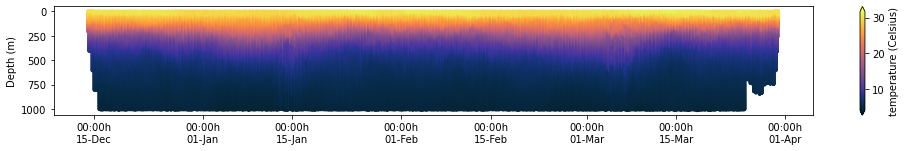

In [9]:
fig, ax = plot_transect(df, "temperature (Celsius)", cmap=Thermal_20.mpl_colormap)

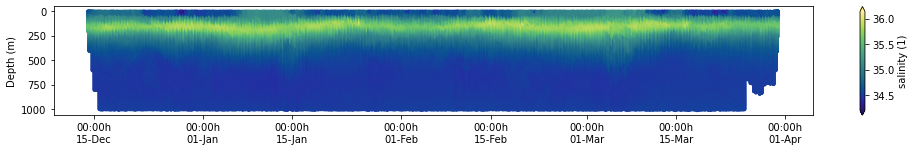

In [10]:
fig, ax = plot_transect(df, "salinity (1)", cmap=Haline_20.mpl_colormap)

In [11]:
def datetime2ytd(time):
    """" Return time in YTD format from datetime format."""
    return  (time - np.datetime64('2019-01-01'))/np.timedelta64(1, 'D')

In [30]:
df = df.rename(columns={'depth (m)':'pressure',
                        'longitude (degrees_east)':'longitude',
                        'latitude (degrees_north)':'latitude',
                        'temperature (Celsius)':'temperature',
                        'salinity (1)':'salinity'})


In [31]:
ds = df.to_xarray()
ds

<xarray.Dataset>
Dimensions:      (time: 110681)
Coordinates:
  * time         (time) datetime64[ns] 2015-12-14T01:49:15 ... 2016-03-30T21:...
Data variables:
    pressure     (time) float64 0.0 113.0 113.5 113.9 ... 3.24 2.44 1.84 0.0
    latitude     (time) float64 -8.178 -8.178 -8.178 ... -8.17 -8.17 -8.17
    longitude    (time) float64 156.8 156.8 156.8 156.8 ... 156.8 156.8 156.8
    salinity     (time) float64 nan 35.39 35.32 35.36 ... 34.61 34.61 34.61 nan
    temperature  (time) float64 nan 25.92 25.93 25.82 ... 29.92 29.92 29.92 nan
    dataset_url  (time) object 'https://gliders.ioos.us/erddap/tabledap/sp006...

### Glider Data Processing

In [32]:
# Convert glider time axis also to year day units, 
# so it matches that units for surface properties.

ds['days'] = datetime2ytd(ds.time)


In [33]:
# Calculate along track distance
dXdist = gt.utils.distance(ds.longitude, ds.latitude)/1e3 # Convert to km
ds['distance'] = xr.DataArray(np.nancumsum(dXdist), 
                                       dims=ds.dims,
                                       coords=ds.coords)


In [34]:
# Group and average locations by dives 
# This makes plotting of locations on a map much faster, as
# there are less points to plot.
# These are used is only for plotting on a 2D map,
# where the depth coordinate is compressed.
ds_locs = xr.Dataset()